<a href="https://colab.research.google.com/github/BernardoHalfeld/lia1-2023-1-Pessoal-/blob/main/Aula12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# **Carregando o dataset**

In [2]:
df = pd.read_csv('dataset.csv', sep=',', index_col=None)
print("dados carregados !")

dados carregados !


In [3]:
display(df)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


# **Análise exploratória**

In [ ]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [ ]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [ ]:
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [ ]:
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [ ]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

# Perguntas de Negócio 
---
* Cidade com maior de vendas totais?

In [ ]:
cidades = df.groupby('Cidade')['Valor_Venda'].sum() 
print("A cidade com maior total de vendas totais é: \n")
print(cidades.idxmax())


A cidade com maior total de vendas totais é: 

New York City


* Total de vendas por data? (gráfico de barras)

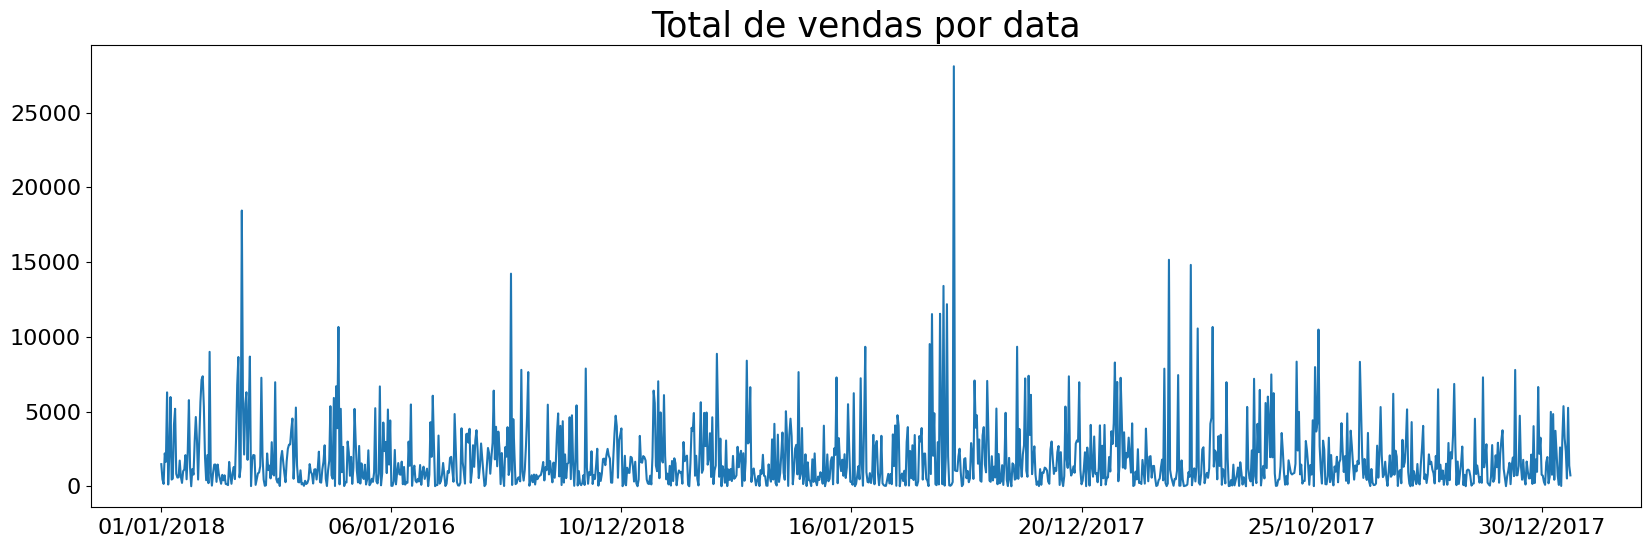

In [ ]:

venda_data = df.groupby('Data_Pedido')['Valor_Venda'].sum()
#print(venda_data)
plt.figure(figsize = (20,6))
plt.title('Total de vendas por data', fontsize = 25)
venda_data.plot(x = 'Data_Pedido',
                y = 'Valor_Venda',
                fontsize = 16
)
plt.xlabel('')
plt.show()




* Total de vendas por estado? (gráfico de barras)

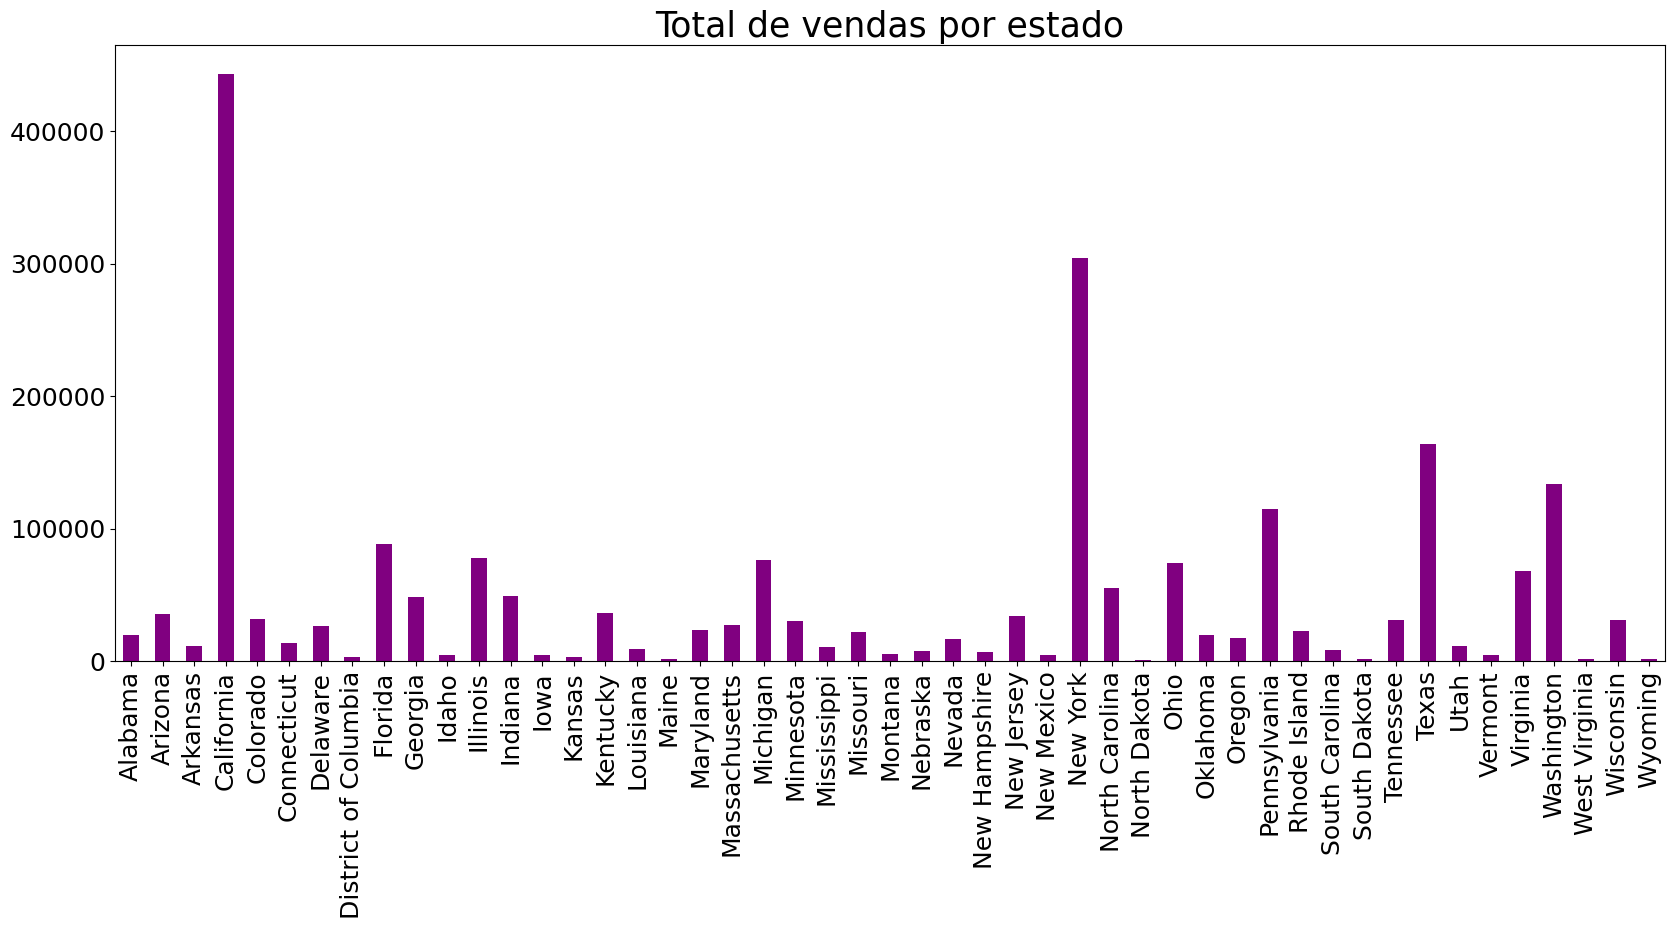

In [ ]:
venda_estado = df.groupby('Estado')['Valor_Venda'].sum()
#print(venda_estado)
plt.figure(figsize = (20,8))
plt.title("Total de vendas por estado", fontsize = 25)
venda_estado.plot.bar(x = 'Estado',
                y = 'Valor_Venda',
               fontsize = 18,
               color = 'purple'
)
plt.xlabel('')
plt.show()

* 10 cidades com maior total de vendas? (gráfico de barras)

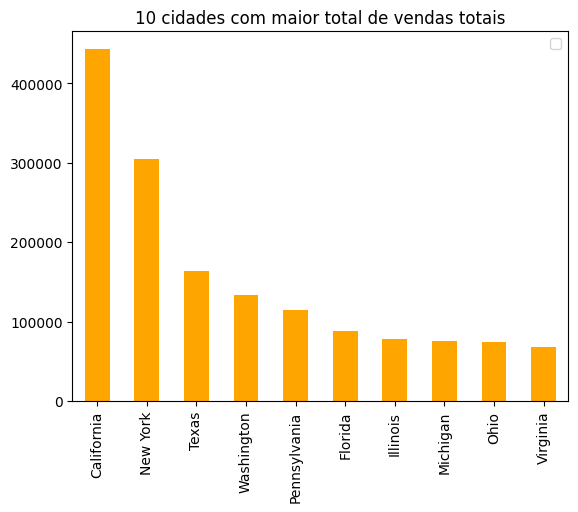

In [ ]:
max_estado = df.groupby('Estado')[('Valor_Venda')].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False). head(10)
#print(max_estado)
max_estado.plot.bar(y = 'Valor_Venda', x = 'Estado', title='10 cidades com maior total de vendas totais', color = 'orange')
plt.xlabel('')
plt.legend('')
plt.show()

* Qual segmento teve maior total de vendas? (gráfico pizza)

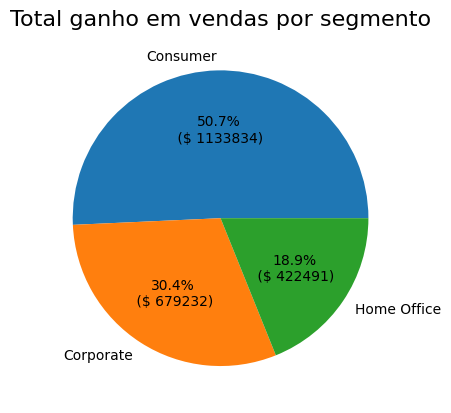

In [ ]:
#print(df.groupby('Segmento')[('Valor_Venda')].sum())
max_seg = df.groupby('Segmento')[('Valor_Venda')].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                  ascending = False)
def func(valores):
  def format(pct):
    total = sum(valores)
    val = int(pct/100.*np.sum(valores))
    return '{:.1f}%\n ($ {v:d})'.format(pct, v=val)
  return format

plt.pie(max_seg['Valor_Venda'],
        labels = max_seg['Segmento'],
        autopct = func(max_seg['Valor_Venda']),
        )

plt.title('Total ganho em vendas por segmento', fontsize = 16)
plt.show()

# **Perguntas Desafios**
---
* Qual o total de vendas por segmento e por ano?

,Segmento,Valor_Venda
0,Consumer,1133834.0
1,Corporate,679232.0
2,Home Office,422491.0


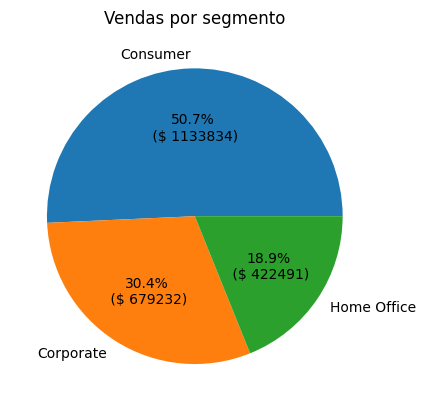

In [ ]:
# Por segmento:
vendas_segmento = df.groupby('Segmento')[("Valor_Venda")].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                  ascending = False)
display(vendas_segmento.round())

def func(valores):
  def format(pct):
    total = sum(valores)
    val = int(pct/100.*np.sum(valores))
    return '{:.1f}%\n ($ {v:d})'.format(pct, v=val)
  return format

plt.pie(vendas_segmento['Valor_Venda'],
        labels = vendas_segmento['Segmento'],
        autopct = func(vendas_segmento['Valor_Venda']),
        )
plt.title('Vendas por segmento')
plt.show()

,Ano,Valor_Venda
0,2015,470768.6001
1,2016,454072.5154
2,2017,595365.9240
3,2018,715350.9152


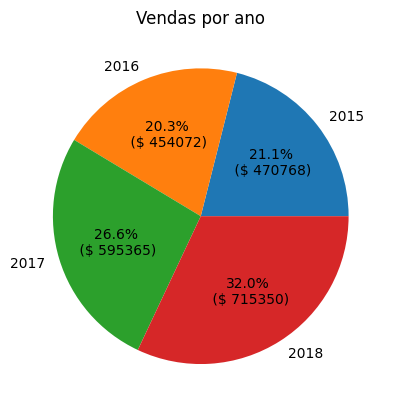

In [ ]:
# Por ano:
df2 = pd.read_csv('dataset.csv', sep=',', index_col=None)

df2['Data_Pedido'] = pd.to_datetime(df2['Data_Pedido'], format = '%d/%m/%Y')
df2['Ano'] = df2['Data_Pedido'].dt.year

vendas_ano = df2.groupby('Ano')['Valor_Venda'].sum().reset_index()
display(vendas_ano)

def func(valores):
  def format(pct):
    total = sum(valores)
    val = int(pct/100.*np.sum(valores))
    return '{:.1f}%\n ($ {v:d})'.format(pct, v=val)
  return format

plt.pie(vendas_ano['Valor_Venda'],
        labels = vendas_ano['Ano'],
        autopct = func(vendas_ano['Valor_Venda'])
        )

plt.title('Vendas por ano')
plt.show()


<ipython-input-219-f16499ceafd8>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vendas_ano_seg = df3.groupby(['Ano', 'Segmento']).sum().reset_index()
<ipython-input-219-f16499ceafd8>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vendas_ano_seg1 = df3.groupby(['Ano', 'Segmento']).sum()


Valor_Venda
Ano  Segmento                
2015 Consumer     256719.9166
     Corporate    125819.5957
     Home Office   88229.0878
2016 Consumer     265295.2593
     Corporate    114643.1229
     Home Office   74134.1332
2017 Consumer     288459.5572
     Corporate    203266.7398
     Home Office  103639.6270
2018 Consumer     323359.6019
     Corporate    235502.7284
     Home Office  156488.5849

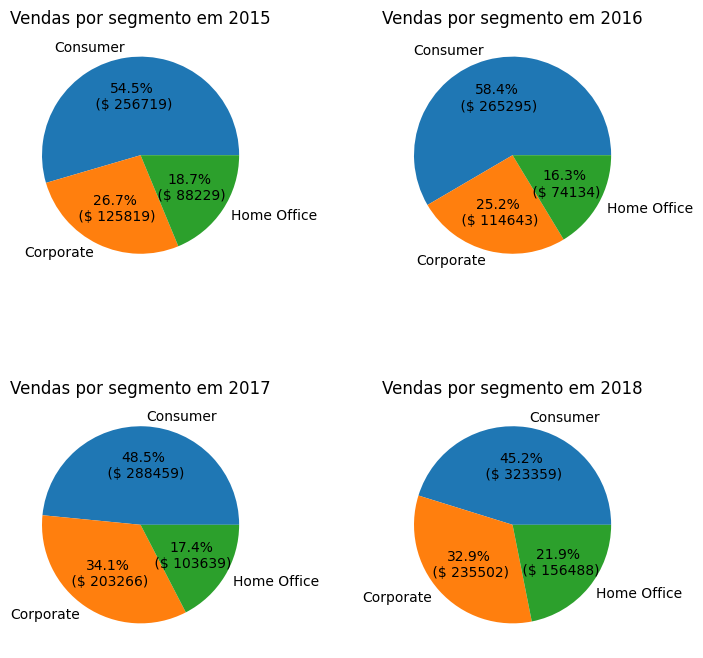

In [ ]:
# Venda por Segmento a cada ano
from matplotlib import gridspec

df3 = pd.read_csv('dataset.csv', sep=',', index_col=None)

df3['Data_Pedido'] = pd.to_datetime(df3['Data_Pedido'], format = '%d/%m/%Y')
df3['Ano'] = df3['Data_Pedido'].dt.year

vendas_ano_seg = df3.groupby(['Ano', 'Segmento']).sum().reset_index()
vendas_ano_seg1 = df3.groupby(['Ano', 'Segmento']).sum()
display(vendas_ano_seg1)

ano_2015 = vendas_ano_seg[(vendas_ano_seg['Ano'] == 2015)]
ano_2016 = vendas_ano_seg[(vendas_ano_seg['Ano'] == 2016)]
ano_2017 = vendas_ano_seg[(vendas_ano_seg['Ano'] == 2017)]
ano_2018 = vendas_ano_seg[(vendas_ano_seg['Ano'] == 2018)]

def func(valores):
  def format(pct):
    total = sum(valores)
    val = int(pct/100.*np.sum(valores))
    return '{:.1f}%\n ($ {v:d})'.format(pct, v=val)
  return format

fig = plt.figure() 
fig.set_figheight(8) 
fig.set_figwidth(8) 
spec = gridspec.GridSpec(ncols=2, nrows=2, 
                         width_ratios=[3, 3], wspace=0.5, 
                         hspace=0.5, height_ratios=[3, 3]) 


ax1 = fig.add_subplot(spec[0])
ax1.set_title('Vendas por segmento em 2015')
ax1.pie(ano_2015['Valor_Venda'],
        labels = ano_2015['Segmento'],
        autopct = func(ano_2015['Valor_Venda'])
        )

ax2 = fig.add_subplot(spec[1])
ax2.set_title('Vendas por segmento em 2016')
ax2.pie(ano_2016['Valor_Venda'],
        labels = ano_2016['Segmento'],
        autopct = func(ano_2016['Valor_Venda'])
        )

ax3 = fig.add_subplot(spec[2])
ax3.set_title('Vendas por segmento em 2017')
ax3.pie(ano_2017['Valor_Venda'],
        labels = ano_2017['Segmento'],
        autopct = func(ano_2017['Valor_Venda'])
        )

ax4 = fig.add_subplot(spec[3])
ax4.set_title('Vendas por segmento em 2018')
ax4.pie(ano_2018['Valor_Venda'],
        labels = ano_2018['Segmento'],
        autopct = func(ano_2018['Valor_Venda'])
        )

plt.show()

* Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

  1. Se o Valor_Venda for maior que 1000 recebe 15% de desconto.

  2. Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

  Quantas Vendas Receberiam 15% de Desconto?

In [ ]:
vendas_acima1000 = (df[df['Valor_Venda'] > 1000])
num_desconto = len(vendas_acima1000)
vendas_totais = len(df)
print(f'{num_desconto} vendas de um total de {vendas_totais} foram no valor acima de 1000 dólares, portanto {num_desconto} vendas receberiam desconto caso as regras forem adotadas pela empresa.')

457 vendas de um total de 9700 foram no valor acima de 1000 dólares, portanto 457 vendas receberiam desconto caso as regras forem adotadas pela empresa.


* Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [ ]:
df1 = pd.read_csv('dataset.csv', sep=',', index_col=None)

media_antes = df1['Valor_Venda'].mean()

df1.loc[df1['Valor_Venda'] > 1000, 'Valor_Venda'] = df1['Valor_Venda']-df1['Valor_Venda']*0.15

media_depois = df1['Valor_Venda'].mean()

In [ ]:
print(f'Antes do desconto de 15% dado pela empresa, a média dos valores de vendas era de: {media_antes}\nApós a política de desconto de 15% para compras acima de 1000 dólares, a média de valores de vendas passou para: {media_depois}')

Antes do desconto de 15% dado pela empresa, a média dos valores de vendas era de: 230.4698922371134
Após a política de desconto de 15% para compras acima de 1000 dólares, a média de valores de vendas passou para: 215.51038958350514


* Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

A média de vendas para o segmento Consumer foi de: $ 225
A média de vendas para o segmento Corporate foi de: $ 232
A média de vendas para o segmento Home Office foi de: $ 244


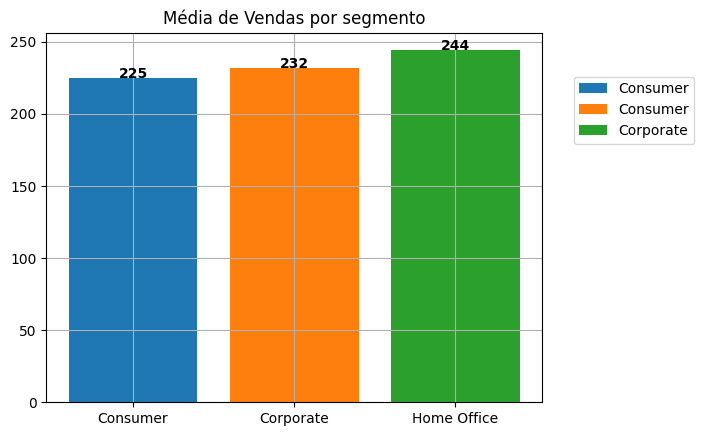

In [87]:
#Média por segmento

med_Cons = df[(df['Segmento'] == 'Consumer')]
med_Cons = med_Cons['Valor_Venda'].mean()
print(f'A média de vendas para o segmento Consumer foi de: $ {round(med_Cons)}')

med_Corp = df[(df['Segmento'] == 'Corporate')]
med_Corp = med_Corp['Valor_Venda'].mean()
print(f'A média de vendas para o segmento Corporate foi de: $ {round(med_Corp)}')

med_HomeOff = df[(df['Segmento'] == 'Home Office')]
med_HomeOff = med_HomeOff['Valor_Venda'].mean()
print(f'A média de vendas para o segmento Home Office foi de: $ {round(med_HomeOff)}') 

fig, ax = plt.subplots()

plt.bar('Consumer', med_Cons)
plt.bar('Corporate', med_Corp)
plt.bar('Home Office', med_HomeOff)

for bar in ax.patches:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      
      bar.get_height() + bar.get_y(),
    
      round(bar.get_height()),
      
      ha='center',
      color='black',
      weight='bold',
      size=10
  )

plt.grid()
plt.title('Média de Vendas por segmento')
plt.legend(df['Segmento'], bbox_to_anchor = (1.05, 0.9))
plt.show()

A média de vendas em 2015 foi de: $ 245
A média de vendas em 2016 foi de: $ 222
A média de vendas em 2017 foi de: $ 245
A média de vendas em 2018 foi de: $ 222


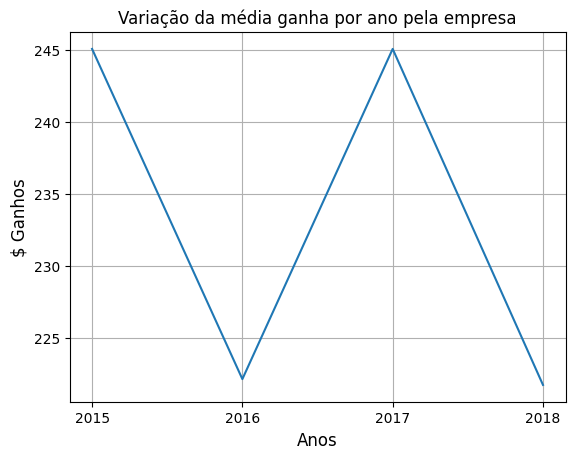

In [151]:
#Média por ano e por mês

df4 = pd.read_csv('dataset.csv', sep=',', index_col=None)

df4['Data_Pedido'] = pd.to_datetime(df4['Data_Pedido'], format = '%d/%m/%Y')
df4['Ano'] = df4['Data_Pedido'].dt.year
df4['Mes'] = df4['Data_Pedido'].dt.month

med2015 = df4[df4['Ano'] == 2015]
med2015 = med2015['Valor_Venda'].mean()
print(f'A média de vendas em 2015 foi de: $ {round(med2015)}')

med2016 = df4[df4['Ano'] == 2016]
med2016 = med2016['Valor_Venda'].mean()
print(f'A média de vendas em 2016 foi de: $ {round(med2016)}')

med2017 = df4[df4['Ano'] == 2015]
med2017 = med2017['Valor_Venda'].mean()
print(f'A média de vendas em 2017 foi de: $ {round(med2017)}')

med2018 = df4[df4['Ano'] == 2018]
med2018 = med2018['Valor_Venda'].mean()
print(f'A média de vendas em 2018 foi de: $ {round(med2018)}')

x = (df4['Ano'].drop_duplicates().reset_index().sort_values(by = 'Ano',ascending = True))
x = x['Ano'].tolist()
y = np.array([med2015, med2016, med2017, med2018])

plt.plot(x, y)
plt.title('Variação da média ganha por ano pela empresa')
plt.grid()
plt.xlabel('Anos', fontsize = 12)
plt.ylabel('$ Ganhos', fontsize = 12)
plt.xticks(range(2015, 2019, 1)) # alterar escala do eixo
plt.show()





<ipython-input-229-70a20e86da58>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  teste = df5.groupby(['AnoMes']).mean().reset_index()


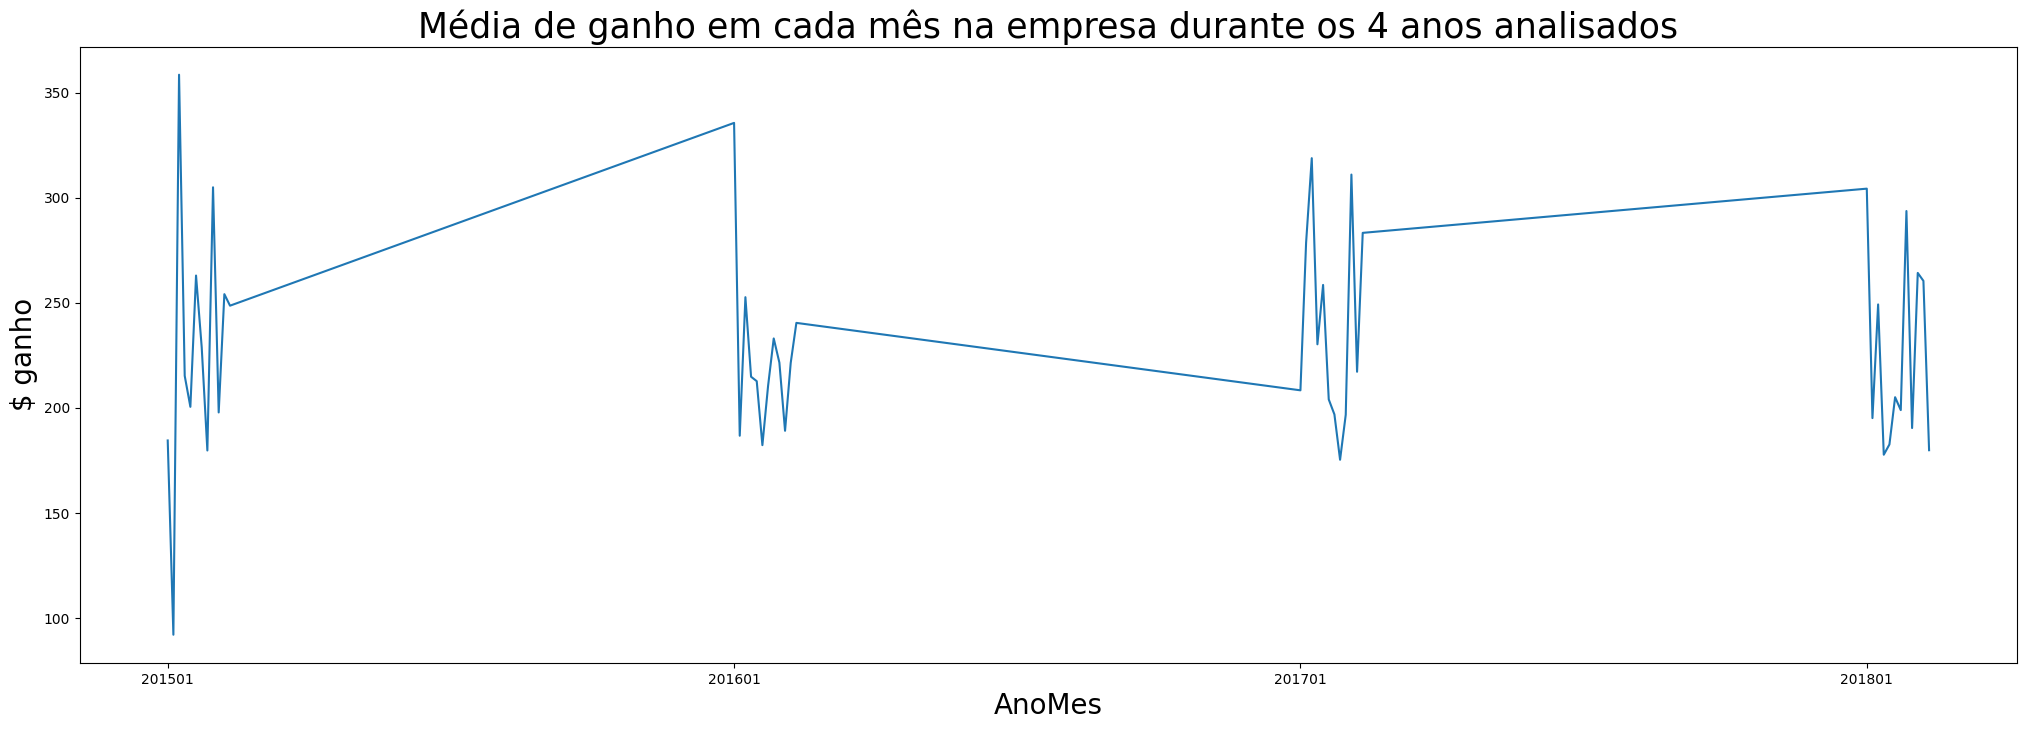

In [229]:
#média por mês:

df5 = pd.read_csv('dataset.csv', sep=',', index_col=None)

df5['Data_Pedido'] = pd.to_datetime(df4['Data_Pedido'], format = '%d/%m/%Y')
df5['AnoMes'] = df4['Data_Pedido'].map(lambda x: 100*x.year + x.month)

teste = df5.groupby(['AnoMes']).mean().reset_index()
#display(teste)

fig = plt.subplots(figsize = (25,8))
plt.plot(teste['AnoMes'], teste['Valor_Venda'])
plt.xticks(range(201501, 201812, 100))
plt.ylabel('$ ganho', fontsize = 20)
plt.xlabel('AnoMes', fontsize = 20)
plt.title('Média de ganho em cada mês na empresa durante os 4 anos analisados', fontsize = 25)
plt.show()


* Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

<ipython-input-14-c1a17edab34e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categorias = df.groupby(['Categoria']).sum().sort_values(by = 'Valor_Venda',


,Categoria,Valor_Venda
0,Technology,823549.3810
1,Furniture,716910.8017
2,Office Supplies,695097.7720


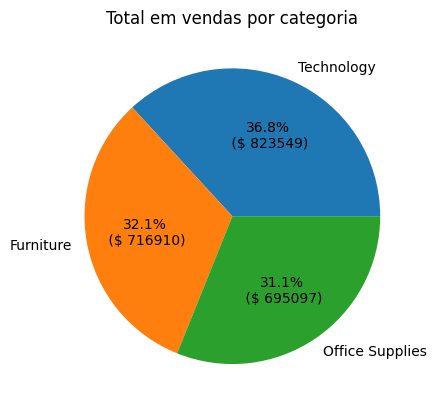

In [14]:
# Por categoria

categorias = df.groupby(['Categoria']).sum().sort_values(by = 'Valor_Venda',
                                                                                  ascending = False).reset_index()
display(categorias)

def func(valores):
  def format(pct):
    total = sum(valores)
    val = int(pct/100.*np.sum(valores))
    return '{:.1f}%\n ($ {v:d})'.format(pct, v=val)
  return format

plt.pie(categorias['Valor_Venda'],
        labels = categorias['Categoria'],
        autopct = func(categorias['Valor_Venda']))

plt.title('Total em vendas por categoria')
plt.show()

<ipython-input-13-960e1144b73f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Scategorias = df.groupby(['SubCategoria']).sum().sort_values(by = 'Valor_Venda',


,SubCategoria,Valor_Venda
0,Phones,325271.2940
1,Chairs,317919.6250
2,Storage,216188.3620
3,Tables,202083.3600
4,Binders,194723.3810
5,Machines,189238.6310
6,Accessories,162791.3620
7,Copiers,146248.0940
8,Bookcases,108045.0467
9,Appliances,104061.6930


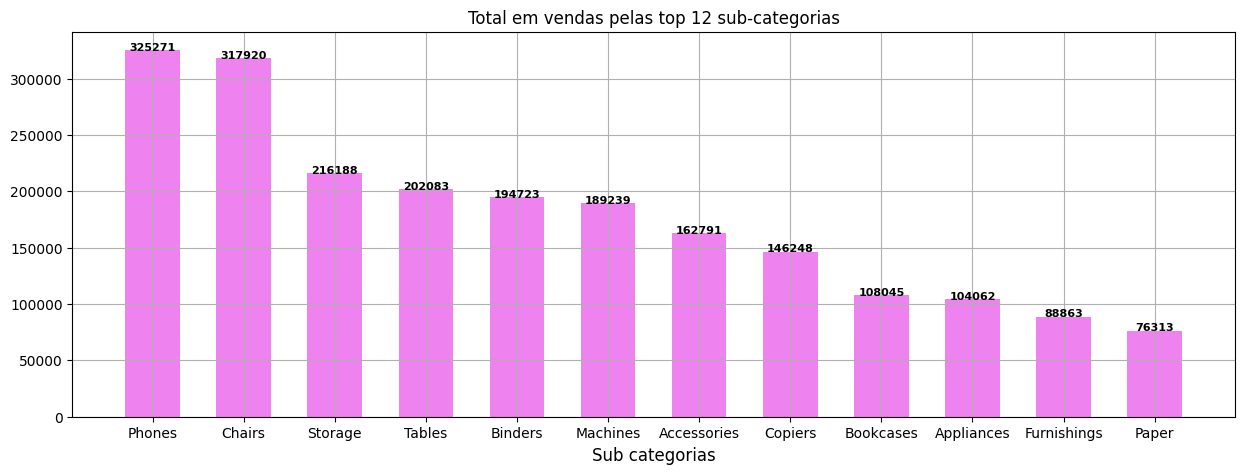

In [13]:
# Por sub-categoria (top 12)

Scategorias = df.groupby(['SubCategoria']).sum().sort_values(by = 'Valor_Venda',
                                                                                  ascending = False).reset_index()
top_Scategorias = Scategorias.head(n=12)
display(top_Scategorias)

fig, ax = plt.subplots(figsize=(15, 5))
plt.bar(top_Scategorias['SubCategoria'], top_Scategorias["Valor_Venda"], width = 0.6, color = 'violet')

for bar in ax.patches:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      
      bar.get_height() + bar.get_y(),
    
      round(bar.get_height()),
      
      ha='center',
      color='black',
      weight='bold',
      size=8
  )

plt.title('Total em vendas pelas top 12 sub-categorias')
plt.xlabel('Sub categorias', fontsize = 12)
plt.grid()
plt.show()

<ipython-input-62-c696a8f23bdc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_cat = df.groupby(['Categoria', 'SubCategoria']).sum().sort_values(by = 'Valor_Venda',
<ipython-input-62-c696a8f23bdc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Scategorias = df.groupby(['SubCategoria']).sum().sort_values(by = 'Valor_Venda',
<ipython-input-62-c696a8f23bdc>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sub_Tech2

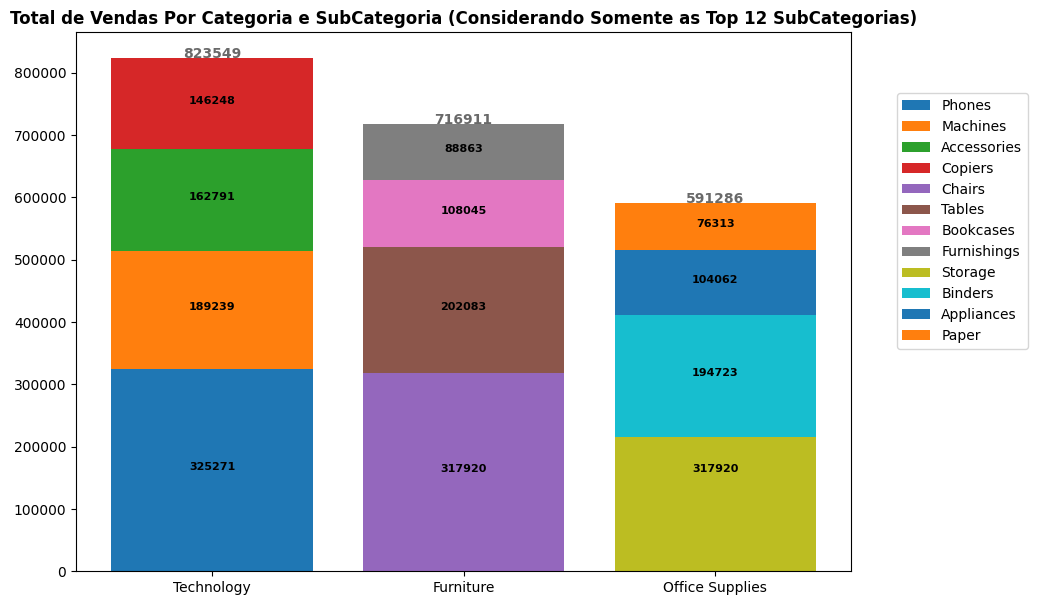

In [62]:
sub_cat = df.groupby(['Categoria', 'SubCategoria']).sum().sort_values(by = 'Valor_Venda',
                                                                                  ascending = False).reset_index()

Scategorias = df.groupby(['SubCategoria']).sum().sort_values(by = 'Valor_Venda',
                                                                                  ascending = False).reset_index()
top_Scategorias = Scategorias.head(n=12)


cat_Subcat = pd.merge(sub_cat, top_Scategorias, how = 'inner', on = 'SubCategoria')
cat_Subcat = cat_Subcat.drop(columns = ['Valor_Venda_y'])
cat_Subcat.rename(columns = {'Valor_Venda_x' : 'Valor_Venda'}, inplace = True)

subcat1 = cat_Subcat.groupby(['Categoria', 'SubCategoria']).sum()
#display(subcat1)
subcat = cat_Subcat.groupby(['Categoria', 'SubCategoria']).sum().sort_values(by = 'Valor_Venda',
                                                                                  ascending = False).reset_index()

Categorias = subcat['Categoria'].drop_duplicates().tolist()

Sub_Tech = subcat[(subcat['Categoria'] == 'Technology')]
Sub_Tech1 = Sub_Tech['SubCategoria'].tolist()
Sub_Tech2 = Sub_Tech.groupby(['SubCategoria']).sum()
valor_Tech = Sub_Tech['Valor_Venda'].tolist()

Sub_Fur = subcat[(subcat['Categoria'] == 'Furniture')]
Sub_Fur1 = Sub_Fur['SubCategoria'].tolist()
Sub_Fur2 = Sub_Fur.groupby(['SubCategoria']).sum()
valor_Fur = Sub_Fur['Valor_Venda'].tolist()

Sub_Ofsp = subcat[(subcat['Categoria'] == 'Office Supplies')]
Sub_Ofsp1 = Sub_Ofsp['SubCategoria'].tolist()
Sub_Ofsp2 = Sub_Ofsp.groupby(['SubCategoria']).sum()
valor_Ofsp = Sub_Ofsp['Valor_Venda'].tolist()

y0 = np.array([valor_Tech[0],valor_Tech[1] , valor_Tech[2], valor_Tech[3]])
y1 = np.array([valor_Fur[0], valor_Fur[1], valor_Fur[2], valor_Fur[3]])
y2 = np.array([valor_Ofsp[0], valor_Ofsp[1], valor_Ofsp[2], valor_Ofsp[3]])

legend = np.array([Sub_Tech1[0], Sub_Tech1[1], Sub_Tech1[2], Sub_Tech1[3],
                   Sub_Fur1[0], Sub_Fur1[1], Sub_Fur1[2], Sub_Fur1[3],
                   Sub_Ofsp1[0], Sub_Ofsp1[1], Sub_Ofsp1[2], Sub_Ofsp1[3]])

totals = subcat1.groupby('Categoria')['Valor_Venda'].sum()
#display(totals)

fig, ax = plt.subplots(figsize = (10, 7))

ax.bar('Technology', y0[0])
ax.bar('Technology', y0[1], bottom = y0[0])
ax.bar('Technology', y0[2], bottom = y0[0]+y0[1])
ax.bar('Technology', y0[3], bottom = y0[0]+y0[1]+y0[2])
ax.bar('Furniture', y1[0])
ax.bar('Furniture', y1[1], bottom = y1[0])
ax.bar('Furniture', y1[2], bottom = y1[0]+y1[1])
ax.bar('Furniture', y1[3], bottom = y1[0]+y1[1]+y1[2])
ax.bar('Office Supplies', y1[0])
ax.bar('Office Supplies', y2[1], bottom = y2[0])
ax.bar('Office Supplies', y2[2], bottom = y2[0]+y2[1])
ax.bar('Office Supplies', y2[3], bottom = y2[0]+y2[1]+y2[2])


for bar in ax.patches:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      0.5*bar.get_height() + bar.get_y(),
      round(bar.get_height()),
      ha='center',
      color='black',
      weight='bold',
      size=8
  )

y_offset = 4
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold', color = 'dimgray')

plt.legend(legend, bbox_to_anchor = (1.05, 0.9))
plt.title('Total de Vendas Por Categoria e SubCategoria (Considerando Somente as Top 12 SubCategorias)', fontsize = 12,weight='bold')
plt.show()